In [2]:
import pylab
import calendar

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import math
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image


pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

1. Lire le dataset vlib.csv
2. Décrire le dataset avec .info(), .describe() 
3. Afficher la taille d'un point de vue ligne et colonne de notre dataframe
4. Afficher les 5 premières lignes du DataFrame. Puis afficher les 5 dernières lignes du DataFrame
5. Afficher le noms des colonnes du dataset

In [2]:
df = pd.read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [40]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
# df.isnull().sum()
for i in df.columns:
    print(i," : ",df[i].isnull().sum())

datetime  :  0
season  :  0
holiday  :  0
workingday  :  0
weather  :  0
temp  :  0
atemp  :  0
humidity  :  0
windspeed  :  0
casual  :  0
registered  :  0
count  :  0


من خلال دراسة أنواع البيانات، هل يمكننا العثور على نمط عطاء أكثر حكمة؟ هل هناك متغيرات ذات كتابة دون المستوى الأمثل؟
حدد هذه المتغيرات بحيث يمكنك عزلها وإعادة معالجتها فيما بعد. قم بإنشاء قائمة بأسماء هذه المتغيرات.

In [3]:
list_variables = ["datetime","season","weather","holiday","workingday"]


Etudier la variable datetime, quelles features peut-t-on créer/extraire avec cette variable ? La variable datetime n'est pas exploitable tel quel. Cependant il est possible d'extraire des informations de celle ci. Comme le mois, le jour ou encore l'heure. Il est tout à fait cohérent de penser que ces variables joueront un rôle dans la prédiction du nombre de vélos loués par jour.

Extraire date, hour, weekday et month. Pour cela vous utiliserez la fonction .apply(lambda x: ...). L'idée ici est de découper les informations dans le datetime et d'isoler les informations qui nous intéresse afin d'en créer des nouvelle variable.

1. Séparer de datetime la partie date et hour. Stocké respectivement dans la colonne "date" et "hour" du DataFrame. Proposer un algorithme permettant de le faire. Puis implémenter le. exemple: "2011-01-01 00:00:00".split()
2. De la nouvelle variable "hour" appliquer la fonction .apply() afin d'isoler l'heure. Comment isoler l'heure de notre variable "hour"?
3. De la variable date, nous voulons extraire le mois, le jour et si oui on c'est un weekend. Pour cela nous allons utiliser le package calendar dont voici un exemple de syntaxe:
df.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").function()]) - Trouver la fonction() permettant d'identifier le jour de la semaine puis celle pour le mois. Stocker ces nouvelles variables dans "weekday" & "month".

Exemples: 
- datetime.strptime("2011-01-01","%Y-%m-%d").weekday()
- calendar.day_name[datetime.strptime("2011-01-01","%Y-%m-%d").weekday()]

In [4]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [5]:
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["date"].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [6]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1])
df["hour"].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: hour, dtype: object

In [7]:
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["hour"].head()

0    00
1    01
2    02
3    03
4    04
Name: hour, dtype: object

In [8]:
datetime.strptime("2011-01-01","%Y-%m-%d").weekday()

5

In [9]:
calendar.day_name[datetime.strptime("2011-01-01","%Y-%m-%d").weekday()]

'Saturday'

In [10]:
df["weekday"] = df.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
df["month"] = df.date.apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [11]:
df["weekday"].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: weekday, dtype: object

In [12]:
df["month"].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

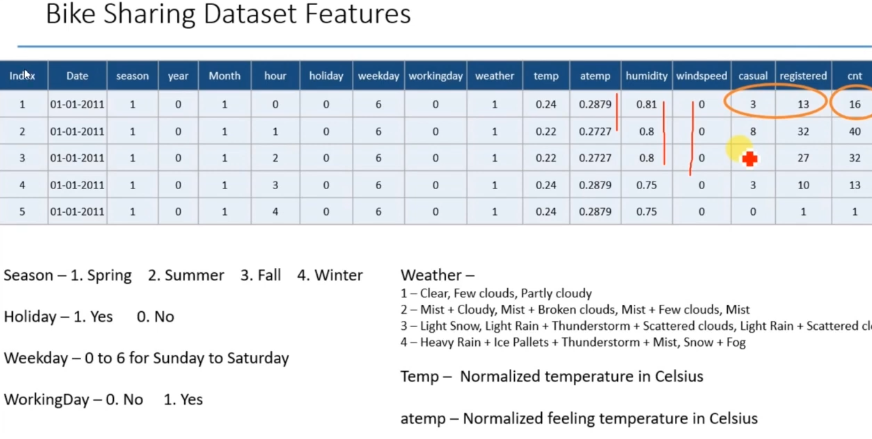

In [22]:
Image(filename='vlib.png')

In [13]:
dictionnaire_saisons = {2: "Spring", 3 : "Summer", 4 : "Fall", 1 :"Winter" }
df["season"] = df.season.map(dictionnaire_saisons)

df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [15]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]

for var in categoryVariableList:
    df[var] = df[var].astype("category")

In [16]:
df=df.drop(["datetime"],axis=1)

In [17]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  date        10886 non-null  object  
 12  hour        10886 non-null  category
 13  weekday     10886 non-null  category
 14  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(1)
memory usage: 757.0+ KB


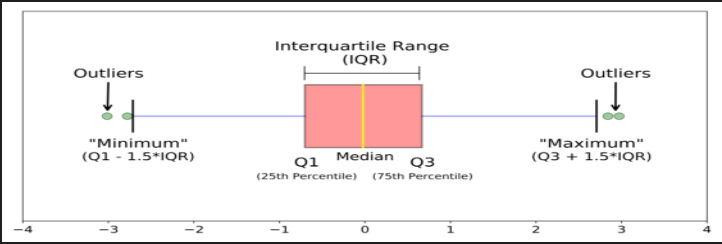

In [21]:
Image(filename='3.png')

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Box Plot On Count')]

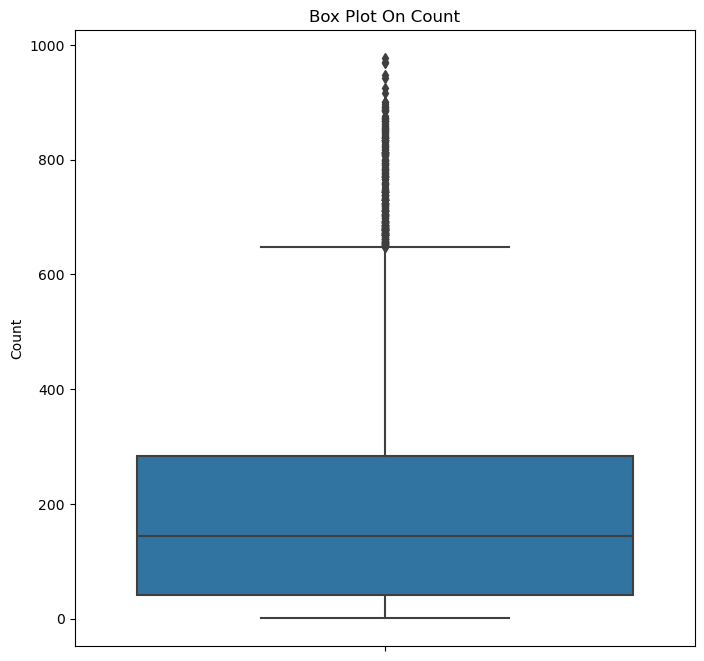

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",orient="v",ax=axes)

axes.set(ylabel='Count',title="Box Plot On Count")

[Text(0.5, 0, 'Season'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Season')]

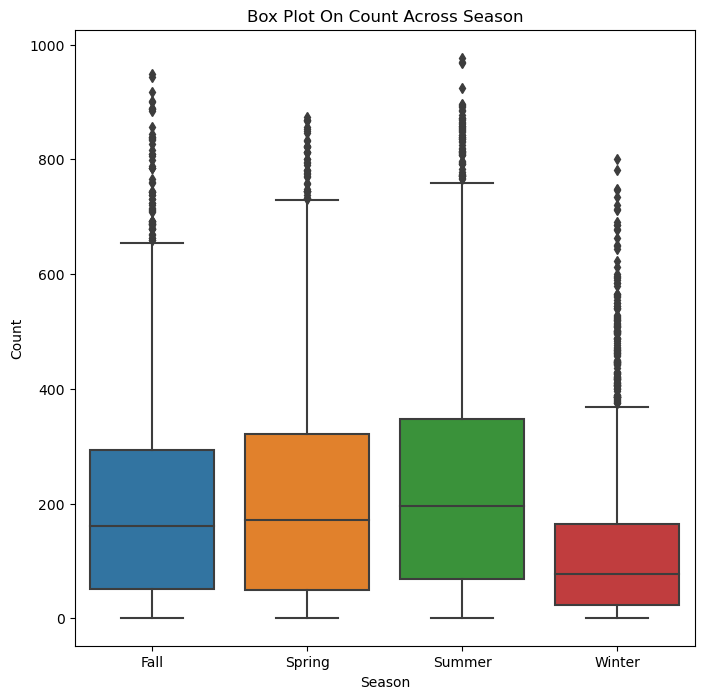

In [30]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hour Of The Day')]

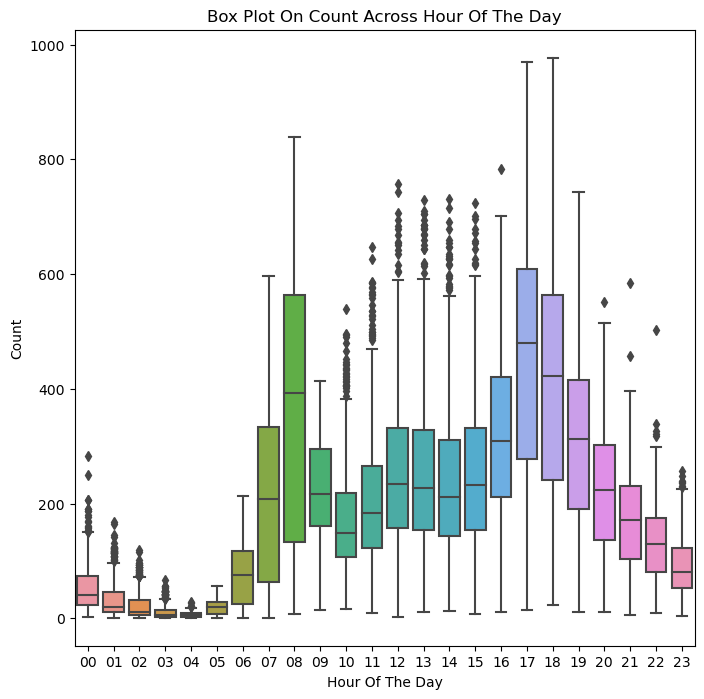

In [31]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="hour",orient="v",ax=axes)
axes.set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

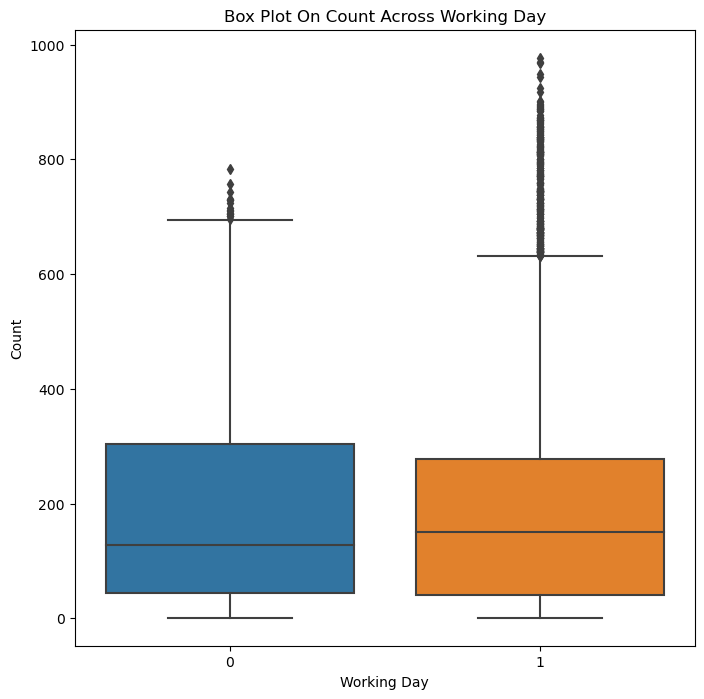

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
sn.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

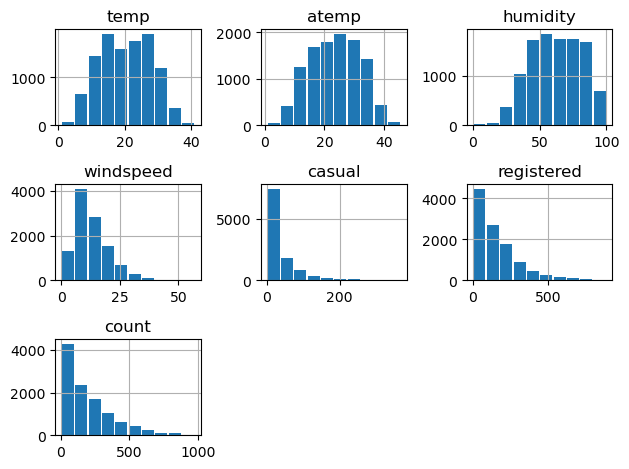

In [33]:
df.hist(rwidth=0.9)
plt.tight_layout()

visualise continuous features vs cnt (y)

plt.tight_layout() : fix distribution

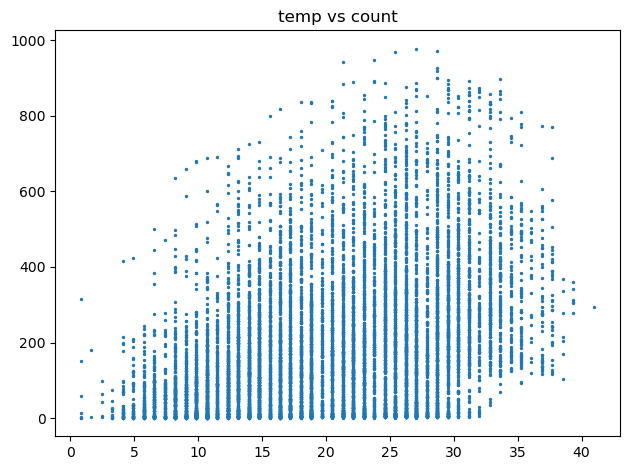

In [35]:

plt.title('temp vs count')
plt.scatter(df['temp'],df['count'],s=2)
plt.tight_layout()


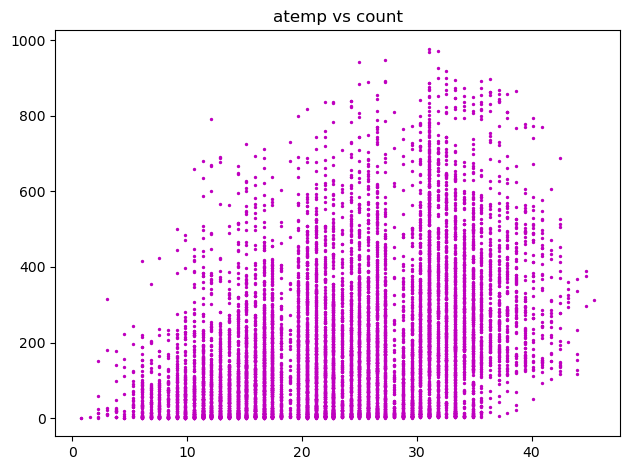

In [37]:
plt.title('atemp vs count')
plt.scatter(df['atemp'],df['count'],s=2,c='m')
plt.tight_layout()

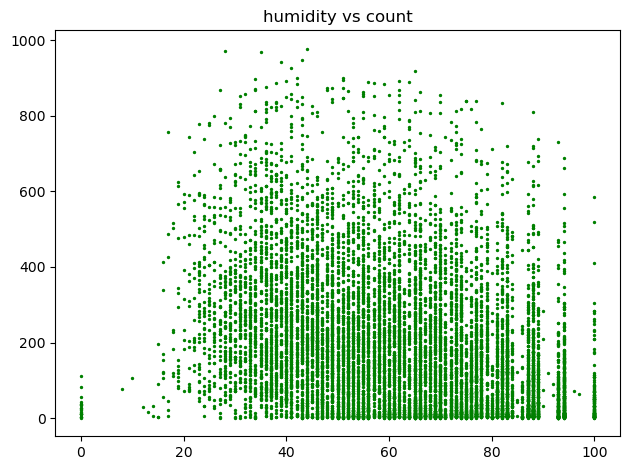

In [38]:
plt.title('humidity vs count')
plt.scatter(df['humidity'],df['count'],s=2,c='g')
plt.tight_layout()

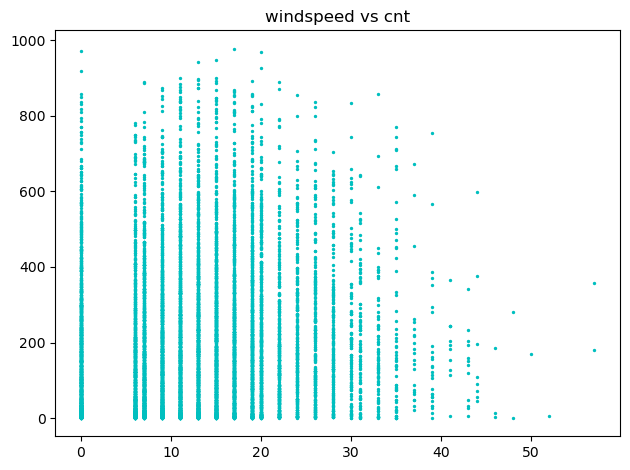

In [39]:

plt.title('windspeed vs cnt')
plt.scatter(df['windspeed'],df['count'],s=2,c='c')
plt.tight_layout()

In [23]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [24]:
df["season"].unique()

['Winter', 'Spring', 'Summer', 'Fall']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

Check for outliers

In [25]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [26]:
df['count'].quantile([0.01,.05,.15,.5,.95,.99])

0.01      2.00
0.05      5.00
0.15     16.00
0.50    145.00
0.95    563.75
0.99    774.15
Name: count, dtype: float64

0,99 = 782.22  !=  max = 977  ===> data more than 0.99 are outliers 

In [27]:
df.shape[0] - df[np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())].shape[0]

147

In [28]:
df_without_outliers = df[
    np.abs(df["count"] - df["count"].mean()) <= (3 * df["count"].std())
] 

In [29]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",df_without_outliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


<Axes: >

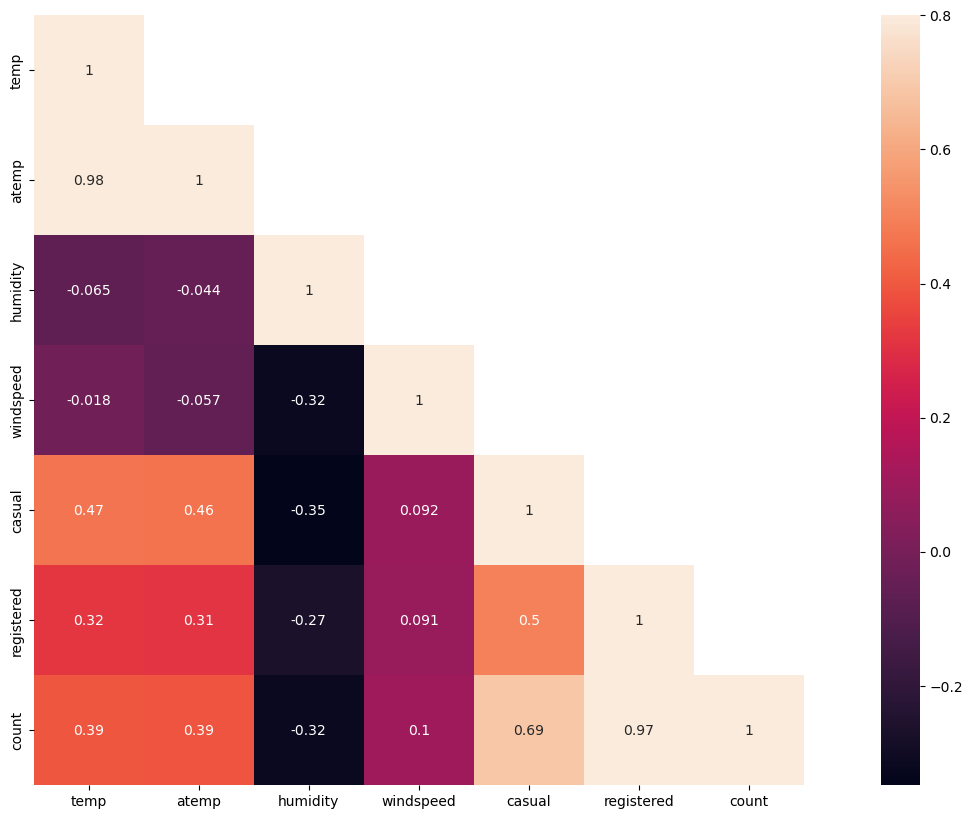

In [30]:
corrMatt = df[['temp','atemp','humidity','windspeed','casual','registered','count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: xlabel='registered', ylabel='count'>

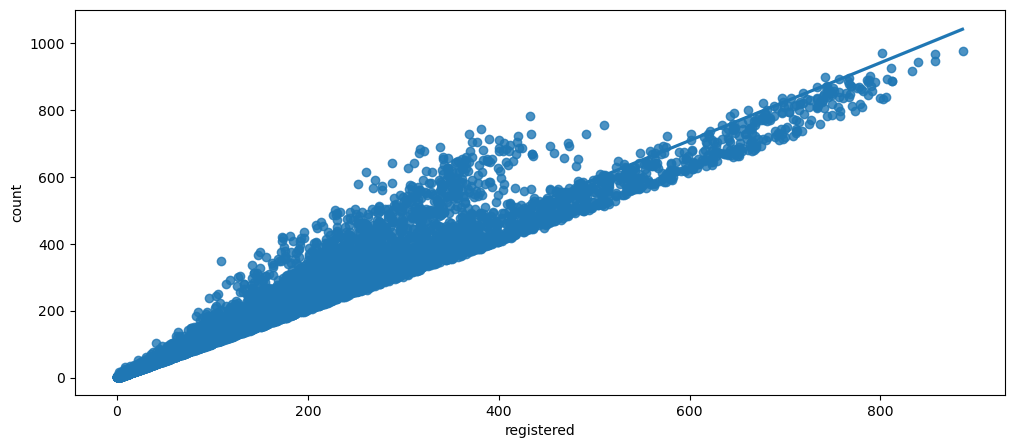

In [31]:
fig,ax = plt.subplots()
fig.set_size_inches(12, 5)
sn.regplot(x="registered", y="count", data=df,ax=ax)

In [32]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Month')]

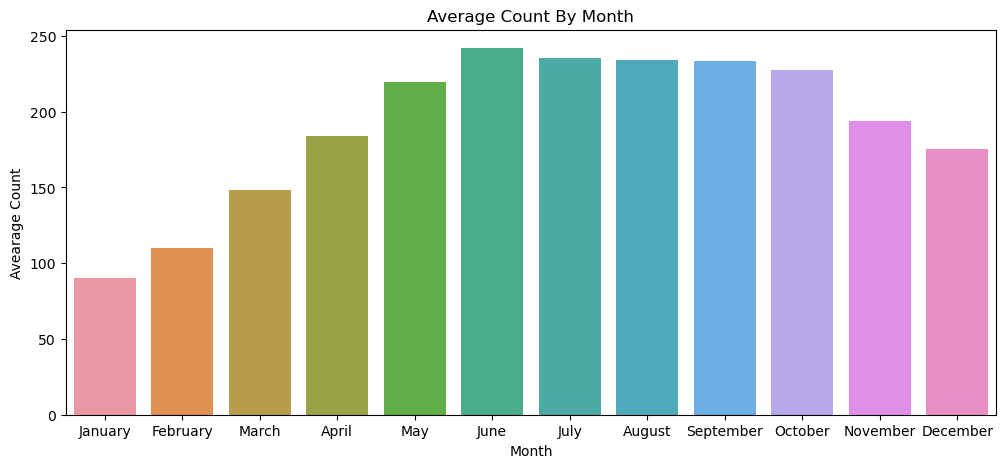

In [64]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.barplot(data=monthAggregated,x="month",y="count",ax=ax,order=sortOrder)
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

In [33]:
hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

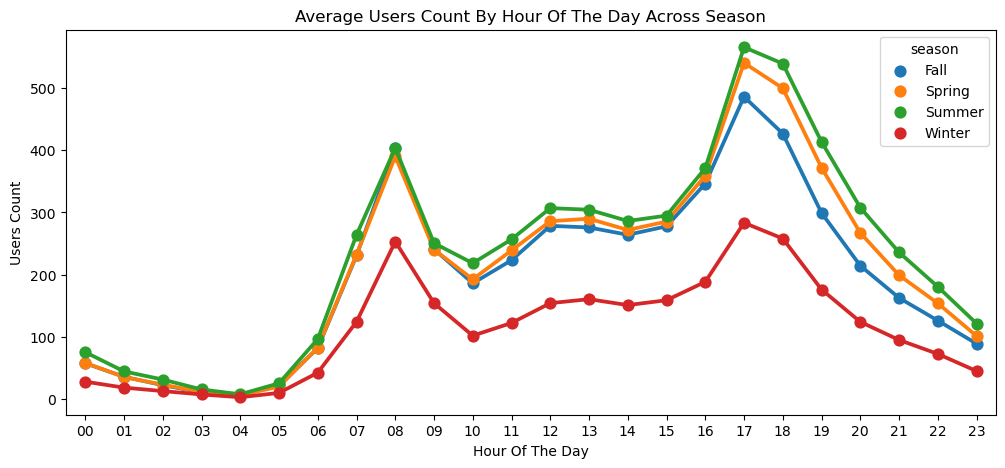

In [34]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

In [35]:
hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

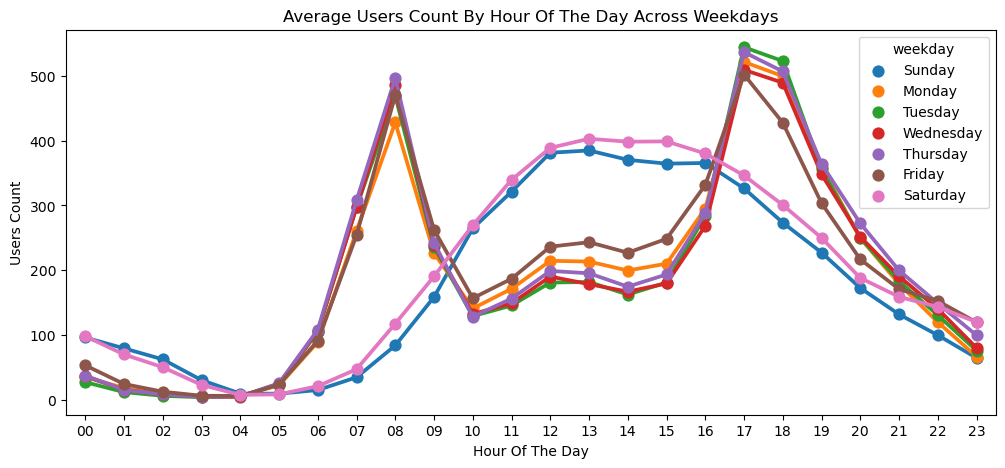

In [36]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [37]:
hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
hourAggregated.head()

,hour,variable,value
0,00,casual,10.312088
1,00,registered,44.826374
2,01,casual,6.513216
3,01,registered,27.345815
4,02,casual,4.819196


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

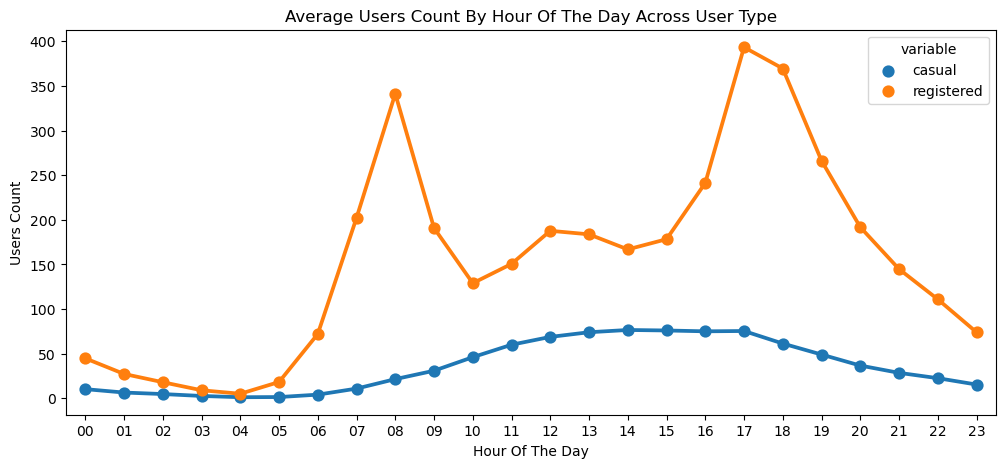

In [38]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)

sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [39]:
dropFeatures = ["casual","date","registered"]
df = df.drop(dropFeatures, axis=1)

In [40]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekday,month
0,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,00,Saturday,January
1,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,01,Saturday,January
2,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,02,Saturday,January
3,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,03,Saturday,January
4,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,04,Saturday,January


In [41]:
df = pd.get_dummies(df,columns=["holiday"])
df = pd.get_dummies(df,columns=["weekday"])
df = pd.get_dummies(df,columns=["month"])
df = pd.get_dummies(df,columns=["season"])
df = pd.get_dummies(df,columns=["weather"])
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 36 columns):
 #   Column                                                                                            Non-Null Count  Dtype   
---  ------                                                                                            --------------  -----   
 0   workingday                                                                                        10886 non-null  category
 1   temp                                                                                              10886 non-null  float64 
 2   atemp                                                                                             10886 non-null  float64 
 3   humidity                                                                                          10886 non-null  int64   
 4   windspeed                                                                                         10886 non-null  floa

------------------------------

Machine learning



1. Importer sklearn
2. importer train_test_split()
2. Utiliser train_test_plit()

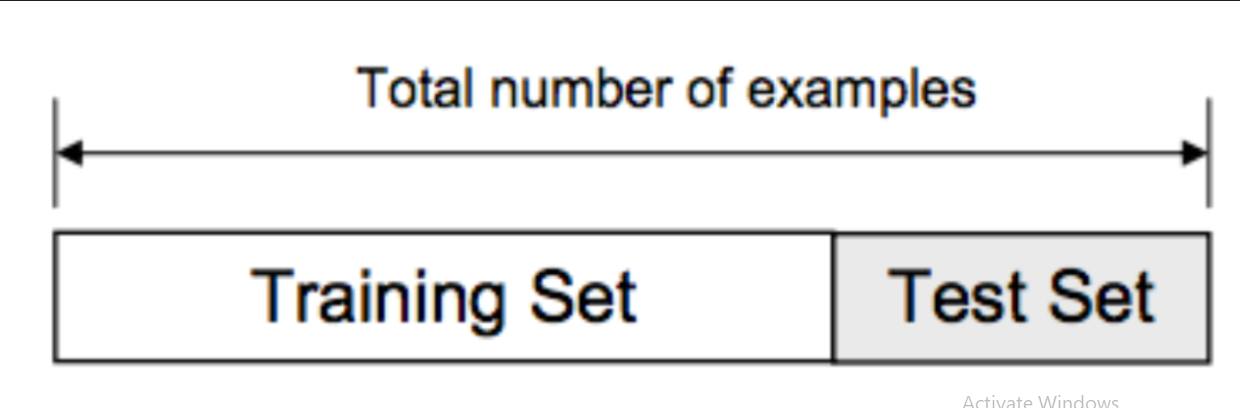

In [23]:

Image(filename='traing.png')

In [43]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop('count', axis=1)
Y = df['count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1234)

In [44]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8708, 35) (2178, 35)
(8708,) (2178,)


قبل تنفيذ النموذج، يجب علينا تحديد مقياس يسمح لنا بمقارنة النماذج المختلفة مع بعضها البعض من أجل تحديد النموذج الأكثر صلة ولكن أيضًا من أجل الحكم على الجودة التنبؤية لنموذجنا النهائي.

للقيام بذلك، قم باستيراد المقاييس من sklearn. سوف نستخدم R2 (r2_score) وهو معامل التحديد ونحسب الارتباط التربيعي بين الواقع والتنبؤ ثم المقياس الذي سنقوم بإنشائه. من المثير للاهتمام دائمًا أن يكون لدينا العديد من المقاييس لمقارنة نماذجنا.

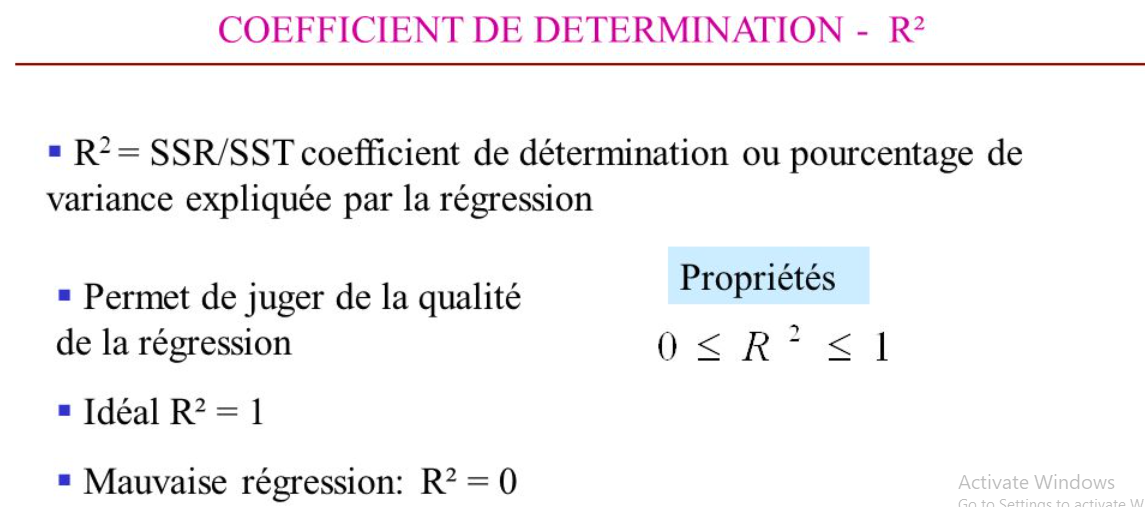

In [24]:
Image(filename='R.png')

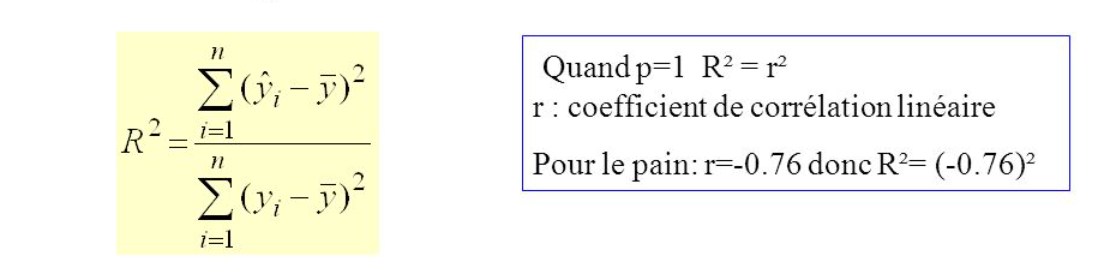

In [25]:
Image(filename='R2.png')

In [45]:
from sklearn import metrics

def rmse(y, y_):
    return np.sqrt(np.mean((y-y_)**2))

def mae(y, y_):
    return np.mean(np.abs(y-y_))

Maintenant que nous avons défini nos 2 métriques, nous allons commencer par utiliser un "modèle" très bête! Le modèle appliquant la moyenne ou la médiane à chaque individu dont nous voulons prédire le nombre de vélo qui sera loués.

L'hsitorique - l'échantillon d'apprentissage, possède à la fois les variables explicatives et la variable à expliquer. Ainsi l'apprentissage d'un DummyRegressor ce fait de la manière suivante: Calcul de la moyenne ou de la médiane de y_train puis application de cette valeur à l'ensemble des X_test. Ainsi pour calculer la performance de notre modèle nous allons comparer y_test et y_pred, qui correspond à la moyenne ou la médiane de ce que l'on trouve dans l'échantillon d'apprentissage.

1. Appliquer Dummyregressor afin d'avoir une baseline
2. Calculer les métriques associées à ce regresseurs.

In [46]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy = "mean")

dummy_regr.fit(X_train, Y_train)
y_pred = dummy_regr.predict(X_test)
print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  -0.0001091323812494327
MAE:  140.67305071426674


1. Tester un premier modèle simple : la régression linéaire. Réaliser un graphe permettant de voir visuellement la qualité de ce modèle. Par exemple scatter de matplotlib permettant de croiser les y_test et les y_pred.
2. Afficher les métriques associées à ce nouveau régresseur

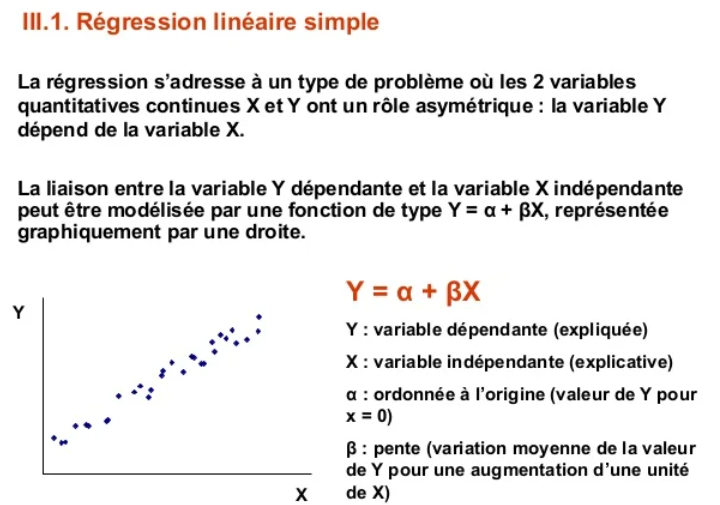

In [26]:
Image(filename='reg.png')

L'exemple ci dessus montre la régréssion linéiare simple. Dans notre cas nous avons un régréssion linéaire multiple car nos variables explicatives sont nombreuses. Ainsi nous cherchons
la meilleur droite telles que: Y = a0 + a1*X1 + a2*X2 + ... + ap*Xp avec p le nombre de variables.

In [47]:
from sklearn.linear_model import LinearRegression

lModel = LinearRegression()
lModel.fit(X=X_train, y=Y_train)
y_pred = lModel.predict(X_test)

print("R2: ", metrics.r2_score(Y_test, y_pred))
print("MAE: ", mae(Y_test, y_pred))

R2:  0.36341724707335255
MAE:  105.39556770202668


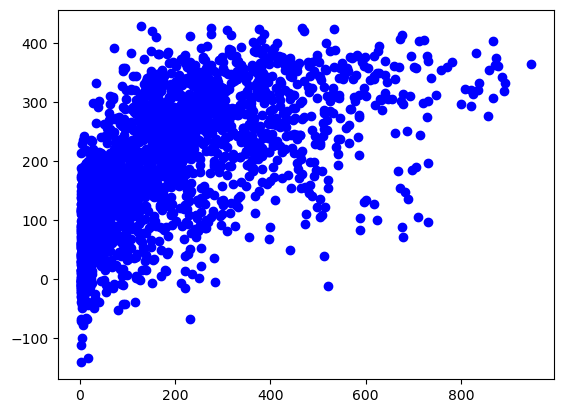

In [48]:
plt.scatter(Y_test, y_pred, color='b')

----------------------------

-----------------------------

Method 2

In [3]:
data = pd.read_csv("vlib hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data = data.drop(['instant','dteday','casual','registered'],axis=1)

In [5]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


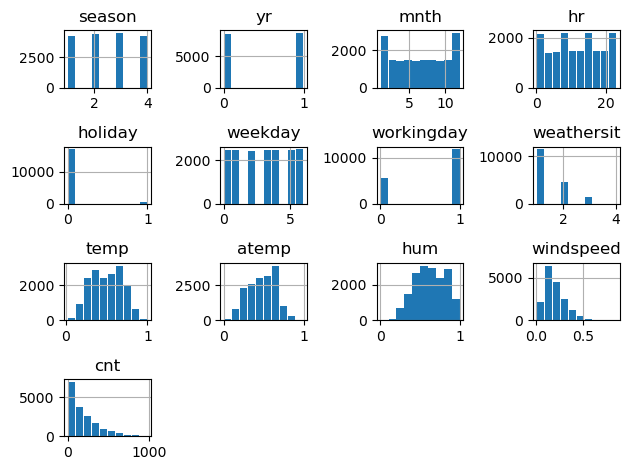

In [52]:
data.hist(rwidth=0.9)
plt.tight_layout()

Visualise the categorical features

categ_list = [1 2 3 4]
categ_avg = season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


<BarContainer object of 4 artists>

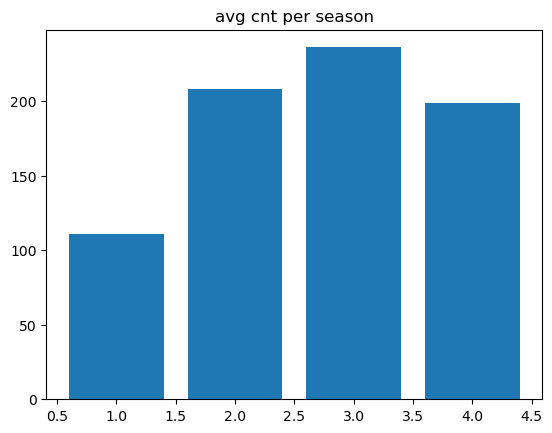

In [54]:
categ_list=data['season'].unique()  # without repetition
categ_avg=data.groupby('season').mean()['cnt']  # avg for each season

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.title('avg cnt per season')
plt.bar(categ_list,categ_avg)

categ_list = [0 1]
categ_avg = yr
0    143.794448
1    234.666361
Name: cnt, dtype: float64


<BarContainer object of 2 artists>

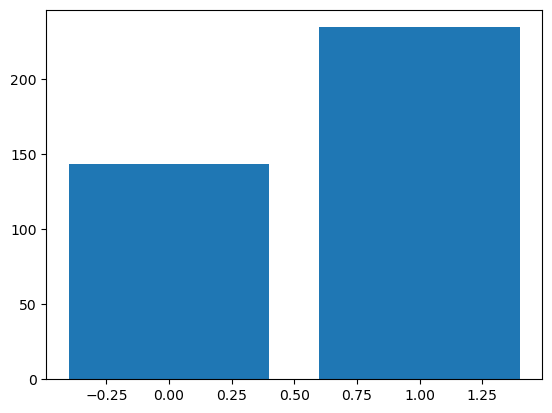

In [56]:
categ_list=data['yr'].unique()  # without repetition
categ_avg=data.groupby('yr').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

categ_list = [ 1  2  3  4  5  6  7  8  9 10 11 12]
categ_avg = mnth
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439
Name: cnt, dtype: float64


<BarContainer object of 12 artists>

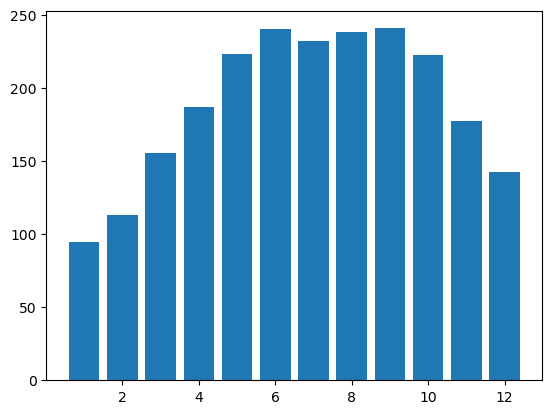

In [57]:
categ_list=data['mnth'].unique()  # without repetition
categ_avg=data.groupby('mnth').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

categ_list = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
categ_avg = hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


<BarContainer object of 24 artists>

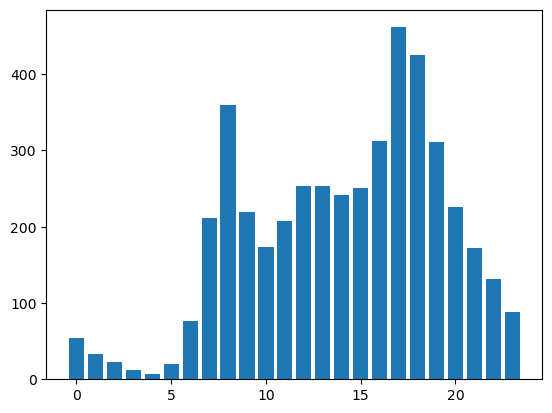

In [58]:
categ_list=data['hr'].unique()  # without repetition
categ_avg=data.groupby('hr').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

categ_list = [0 1]
categ_avg = holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64


<BarContainer object of 2 artists>

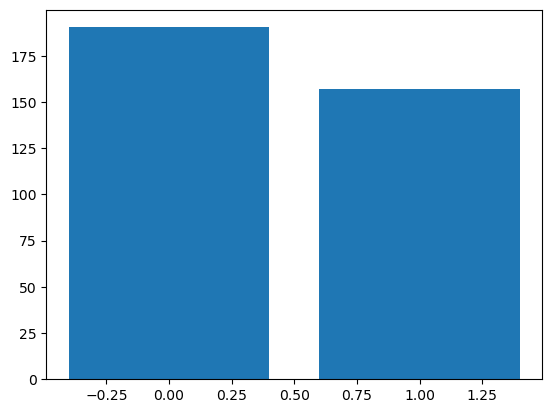

In [59]:
categ_list=data['holiday'].unique()  # without repetition
categ_avg=data.groupby('holiday').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

categ_list = [0 1]
categ_avg = workingday
0    181.405332
1    193.207754
Name: cnt, dtype: float64


<BarContainer object of 2 artists>

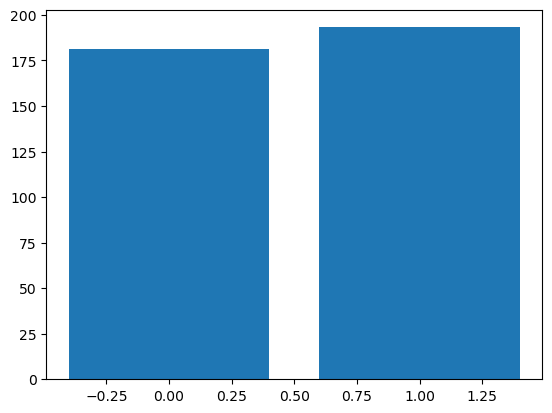

In [60]:
categ_list=data['workingday'].unique()  # without repetition
categ_avg=data.groupby('workingday').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

categ_list = [1 2 3 4]
categ_avg = weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


<BarContainer object of 4 artists>

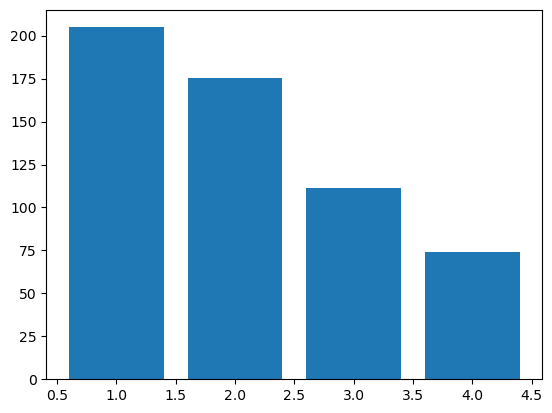

In [61]:
categ_list=data['weathersit'].unique()  # without repetition
categ_avg=data.groupby('weathersit').mean()['cnt']  

print(f'categ_list = {categ_list}')
print(f'categ_avg = {categ_avg}')

plt.bar(categ_list,categ_avg)

In [6]:
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [7]:
data['cnt'].quantile([0.01,.05,.15,.5,.95,.99])

0.01      2.00
0.05      5.00
0.15     16.00
0.50    142.00
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

0,99 = 782.22  !=  max = 977  ===> data more than 0.99 are outliers  

-------------------------------------------------

correlation matrix 

In [8]:
corr=data[['temp','atemp','hum','windspeed','cnt']].corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


drop features that not related with (cnt)

In [9]:
data = data.drop(['weekday','yr','workingday','atemp','windspeed'],axis=1)
data.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


Autocorrelation of cnt using acor

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1eadf522a50>)

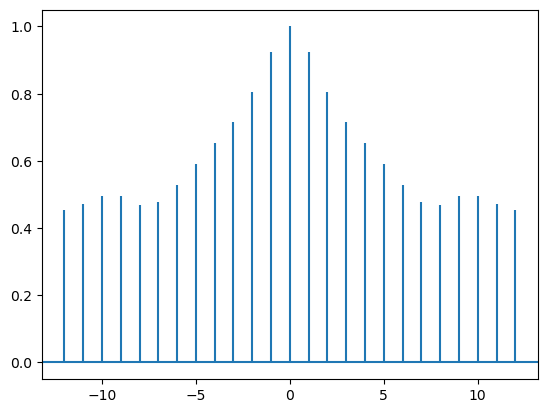

In [70]:
data1= pd.to_numeric(df['cnt'],downcast='float')
plt.acorr(data1,maxlags=12)

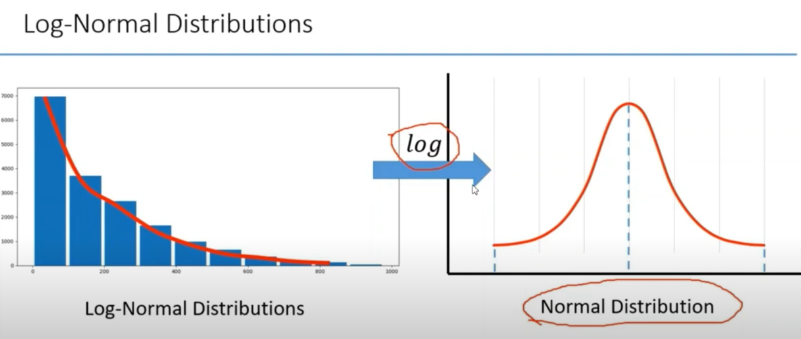

In [4]:
Image(filename='1.png')

In [10]:
df2 = data['cnt']
df3=np.log(df2)

<Axes: >

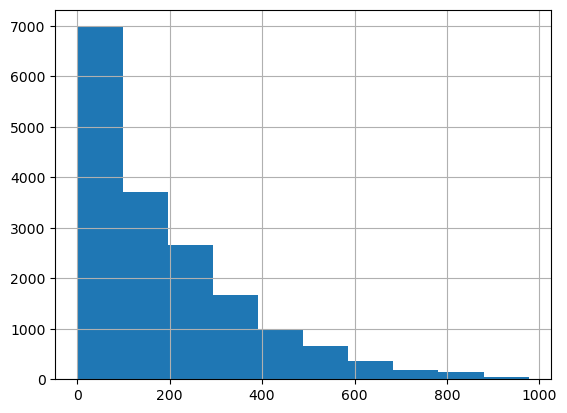

In [11]:
df2.hist()

<Axes: >

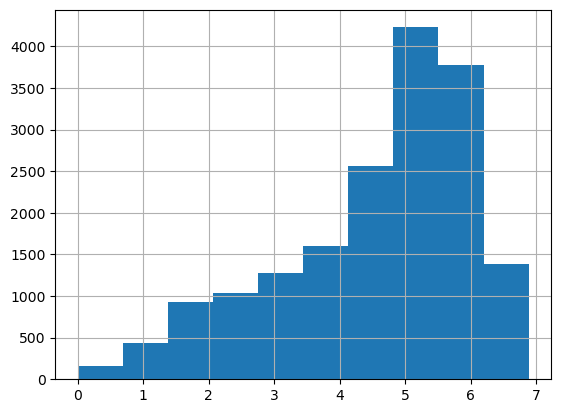

In [12]:
df3.hist()

df['cnt']= np.log(df['cnt'])

-----------------------------------------------

Solve the problem of Autocorrelation


Shift cnt by 3 lags

In [13]:
t_1=data['cnt'].shift(+1).to_frame()
t_1.columns=['t_1']

t_2=data['cnt'].shift(+2).to_frame()
t_2.columns=['t_2']

t_3=data['cnt'].shift(+3).to_frame()
t_3.columns=['t_3']


In [15]:
df_lag = pd.concat([data,t_1,t_2,t_3],axis=1)
df_lag.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t_1,t_2,t_3
0,1,1,0,0,1,0.24,0.81,16,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,40,16.0,NaN,NaN
2,1,1,2,0,1,0.22,0.80,32,40.0,16.0,NaN
3,1,1,3,0,1,0.24,0.75,13,32.0,40.0,16.0
4,1,1,4,0,1,0.24,0.75,1,13.0,32.0,40.0


In [16]:
# drop NaN data
df_lag=df_lag.dropna()
df_lag.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t_1,t_2,t_3
3,1,1,3,0,1,0.24,0.75,13,32.0,40.0,16.0
4,1,1,4,0,1,0.24,0.75,1,13.0,32.0,40.0
5,1,1,5,0,2,0.24,0.75,1,1.0,13.0,32.0
6,1,1,6,0,1,0.22,0.80,2,1.0,1.0,13.0
7,1,1,7,0,1,0.20,0.86,3,2.0,1.0,1.0


Create Dummy variables

In [17]:
df_lag.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weathersit      int64
temp          float64
hum           float64
cnt             int64
t_1           float64
t_2           float64
t_3           float64
dtype: object

In [18]:
df_lag['season']= df_lag['season'].astype('category')
df_lag['mnth']= df_lag['mnth'].astype('category')
df_lag['hr']= df_lag['hr'].astype('category')
df_lag['holiday']= df_lag['holiday'].astype('category')
df_lag['weathersit']= df_lag['weathersit'].astype('category')

df_lag = pd.get_dummies(df_lag,drop_first=True)

In [19]:
df_lag.head()

,temp,hum,cnt,t_1,t_2,t_3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
3,0.24,0.75,13,32.0,40.0,16.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,1,13.0,32.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,1,1.0,13.0,32.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,2,1.0,1.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,3,2.0,1.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


--------------------------------------------

Machine learning


In [20]:
df_lag.head()

,temp,hum,cnt,t_1,t_2,t_3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
3,0.24,0.75,13,32.0,40.0,16.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,1,13.0,32.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,1,1.0,13.0,32.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,2,1.0,1.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,3,2.0,1.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
df_lag.columns

Index(['temp', 'hum', 'cnt', 't_1', 't_2', 't_3', 'season_2', 'season_3',
       'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [23]:
dff=['cnt','temp', 'hum',  't_1', 't_2', 't_3', 'season_2', 'season_3',
       'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4']

df_lag = df_lag[dff]
df_lag.head()

,cnt,temp,hum,t_1,t_2,t_3,season_2,season_3,season_4,mnth_2,...,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
3,13,0.24,0.75,32.0,40.0,16.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.24,0.75,13.0,32.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,0.24,0.75,1.0,13.0,32.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,2,0.22,0.80,1.0,1.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3,0.20,0.86,2.0,1.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
y= df_lag.iloc[:,0]
x= df_lag.iloc[:,1:]

In [27]:
train_size=int(0.7*len(x))

In [30]:
x_train=x.values[0:train_size]
x_test=x.values[train_size:len(x)]

In [31]:
y_train=y.values[0:train_size]
y_test=y.values[train_size:len(y)]

In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
r2_train=reg.score(x_train,y_train)
r2_test=reg.score(x_test,y_test)
print(r2_train)
print(r2_test)

0.8827505519524477
0.859264294462069


In [39]:
y_predict = reg.predict(x_test)
y_predict

array([69.16983427, 45.56572552, 41.31885345, ..., 59.29278848,
       63.96939012, 14.58393509])

In [40]:
from sklearn.metrics import mean_squared_error 
rmse=math.sqrt(mean_squared_error(y_test,y_predict))
rmse

82.67504354244669